In [1]:
import numpy as np
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [2]:
model = read_sbml_model('iCW773_psilocybin.xml')

No objective coefficients in model. Unclear what should be optimized


In [3]:
model.objective = model.reactions.CG_biomass_cgl_ATCC13032
model.optimize().objective_value

0.428929662134894

In [4]:
fseof = FSEOF(model)

In [5]:
model.metabolites.query('psi','id')

[<Metabolite psii_c at 0x194421caf60>,
 <Metabolite psi_c at 0x194421caeb8>,
 <Metabolite psi_e at 0x194421caf98>]

In [6]:
f_result = fseof.run(target=model.reactions.EX_psi_e)
FRDT = f_result.data_frame

In [7]:
from matplotlib import pyplot as plt

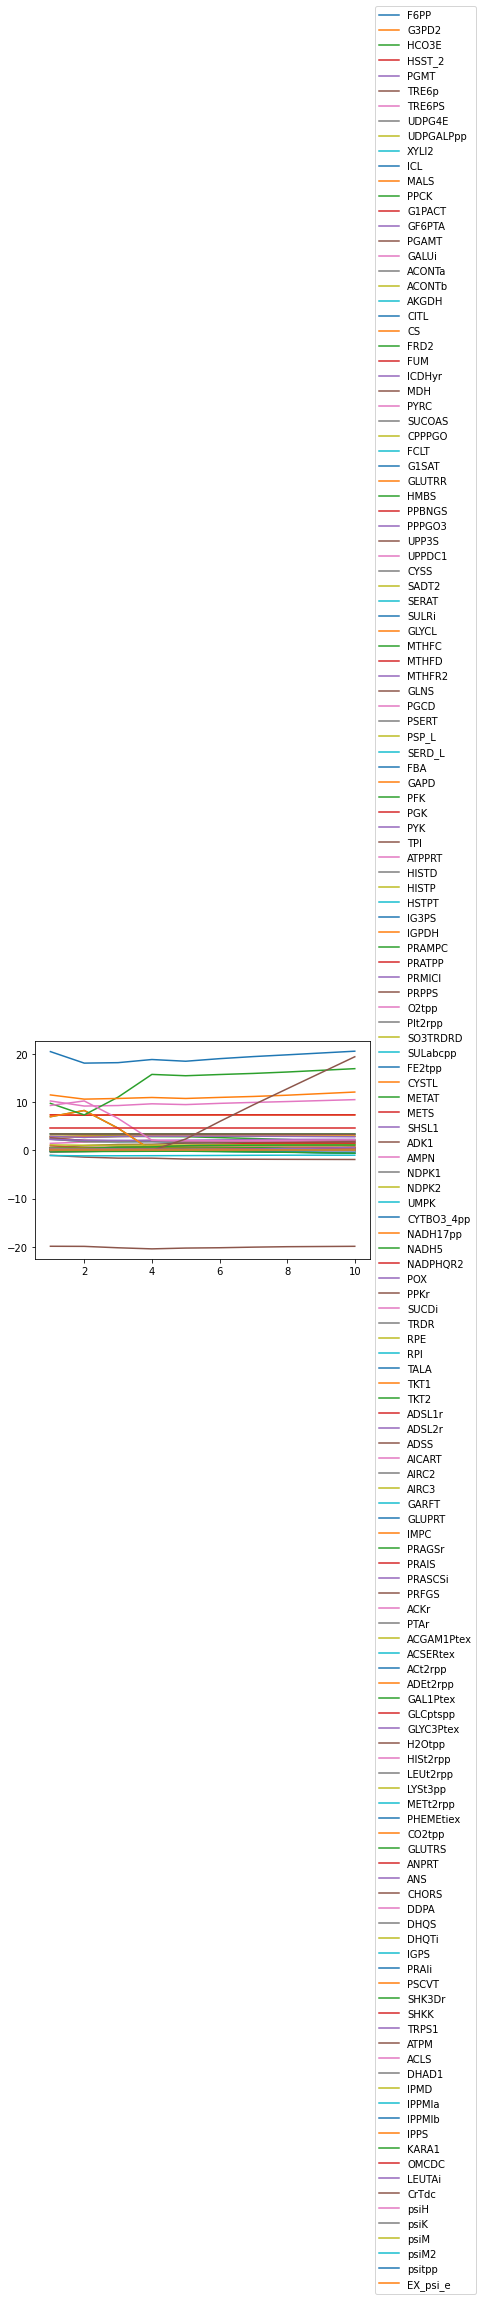

In [8]:
FRDT.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [9]:
#Sorting
FRDT2 = FRDT.sort_values(by=[1], ascending = False)
#Removing 0s
R0_FRDT2 = (FRDT2 != 0.0).all(axis=1)
FRDT3 = FRDT2.loc[R0_FRDT2]

Text(0.5, 1.0, 'Flux Scanning Based on Enforced Objective Flux')

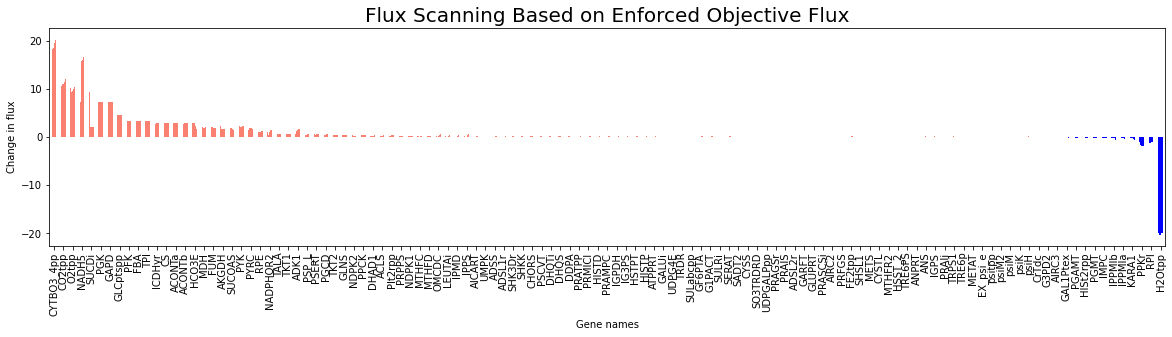

In [10]:
def bar_color(FRDT3, color1, color2):
    return np.where(FRDT3.values >=0, color1, color2).T

fig = FRDT3.plot(legend = None, kind= 'bar', color= bar_color(FRDT3, 'salmon','blue'), figsize= (20,4), grid= False)
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux Scanning Based on Enforced Objective Flux', size = 20)

In [11]:
FRDT3['RCiF'] = (FRDT3[10]-FRDT3[1])/FRDT3[10]+1

C:\Users\fjarios\Anaconda3\envs\carveme_ex5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
target_reactions = FRDT3[FRDT3['RCiF'] > 1.8]

In [13]:
target_reactions

,1,2,3,4,5,6,7,8,9,10,RCiF
SERAT,0.051600,0.046501,0.041403,0.129273,0.204466,0.245536,0.279938,0.290761,0.284346,0.277931,1.814342
ANPRT,0.011792,0.106832,0.127371,0.150370,0.134671,0.115913,0.089324,0.080820,0.089553,0.098286,1.880024
ANS,0.011792,0.106832,0.127371,0.150370,0.134671,0.115913,0.089324,0.080820,0.089553,0.098286,1.880024
IGPS,0.011792,0.106832,0.127371,0.150370,0.134671,0.115913,0.089324,0.080820,0.089553,0.098286,1.880024
PRAIi,0.011792,0.106832,0.127371,0.150370,0.134671,0.115913,0.089324,0.080820,0.089553,0.098286,1.880024
TRPS1,0.011792,0.106832,0.127371,0.150370,0.134671,0.115913,0.089324,0.080820,0.089553,0.098286,1.880024
EX_psi_e,0.000005,0.000010,0.000015,0.000021,0.000026,0.000031,0.000036,0.000041,0.000046,0.000051,1.900000
psitpp,0.000005,0.000010,0.000015,0.000021,0.000026,0.000031,0.000036,0.000041,0.000046,0.000051,1.901961
psiM2,0.000005,0.000010,0.000015,0.000021,0.000026,0.000031,0.000036,0.000041,0.000046,0.000051,1.901961
psiM,0.000005,0.000010,0.000015,0.000021,0.000026,0.000031,0.000036,0.000041,0.000046,0.000051,1.901961


In [14]:
TR = target_reactions.drop(labels='RCiF', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

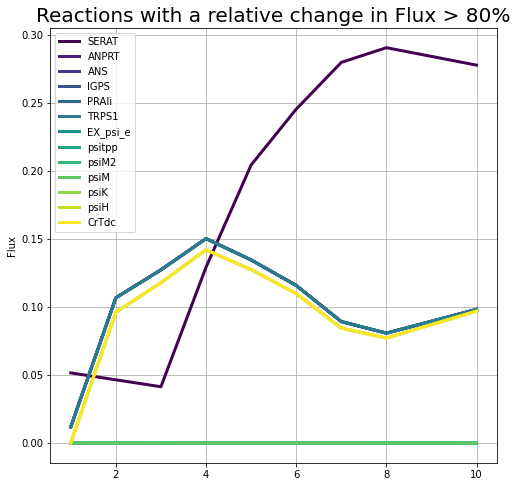

In [15]:
fig2 = TR.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig2.set_ylabel('Flux')
fig2.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [22]:
model.reactions.ANPRT

Reaction identifier,ANPRT
Name,anthranilate phosphoribosyltransferase
Memory address,0x019442a55358
Stoichiometry,anth_c + prpp_c --> ppi_c + pran_c Anthranilate + 5-Phospho-alpha_D_ribose 1_Diphosphate --> Diphosphate + N-(5-Phospho_D_ribosyl)anthranilate
GPR,cg3361
Lower bound,0.0
Upper bound,0.22043


In [17]:
from cameo.flux_analysis.analysis import phenotypic_phase_plane
from cameo.strain_design.deterministic import DifferentialFVA
from cameo.visualization import plotting

In [18]:
plotter = PlotlyPlotter()

NameError: name 'PlotlyPlotter' is not defined

In [ ]:
production_envelope = phenotypic_phase_plane(model, 
                                             variables=[model.reactions.CG_biomass_cgl_ATCC13032],
                                             objective=model.metabolites.psi_c)
production_envelope.plot(plotter)

# No Success with Differential flux variability analysis

In [ ]:
#Sorting
FRDT2 = FRDT.sort_values(by=[1], ascending = False)
#Removing 0s
R0_FRDT2 = (FRDT2 != 0.0).all(axis=1)
FRDT3 = FRDT2.loc[R0_FRDT2]

In [ ]:
def bar_color(FRDT3, color1, color2):
    return np.where(FRDT3.values >=0, color1, color2).T

fig = FRDT3.plot(legend = None, kind= 'bar', color= bar_color(FRDT3, 'green','orange'), figsize= (20,4), grid= False)
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux Scanning Based on Enforced Objective Flux', size = 20)

In [ ]:
FRDT3['RCiF'] = (FRDT3[10]-FRDT3[1])/FRDT3[10]+1

In [ ]:
target_reactions = FRDT3[FRDT3['RCiF'] > 1.8]

In [ ]:
target_reactions

In [ ]:
TR = target_reactions.drop(labels='RCiF', axis=1)

In [ ]:
fig2 = TR.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig2.set_ylabel('Flux')
fig2.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [ ]:
model.reactions.IPPMIa